In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import joblib
import os

In [10]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

print("Tain data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)


Tain data shape:  (8000, 10)
Test data shape:  (2000, 10)


In [14]:
#Handle class imbalance
ratio = y_train.value_counts()
scale_pos_weight = ratio[0] / ratio[1]
print(f"scale_pos_weight = {scale_pos_weight:.2f}")

scale_pos_weight = 3.87


In [15]:
#Train xgb_model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [16]:
#Evaluate Performance
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:,1]

#Metrics
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {roc:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.821
ROC-AUC: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      1607
           1       0.53      0.76      0.62       393

    accuracy                           0.82      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.85      0.82      0.83      2000



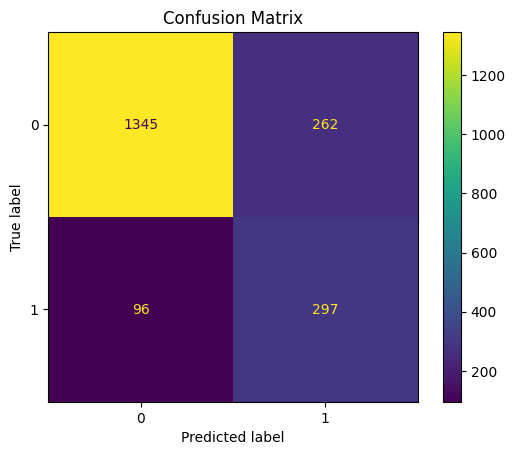

In [25]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

In [29]:
cm

array([[1345,  262],
       [  96,  297]])

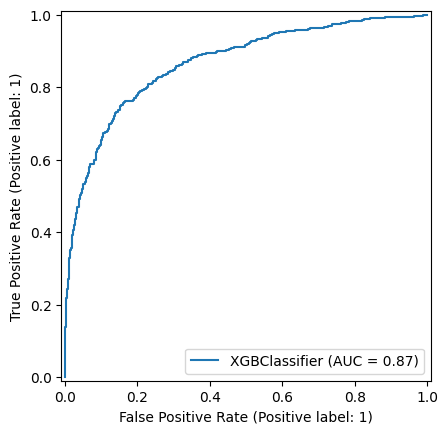

In [27]:
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.show()

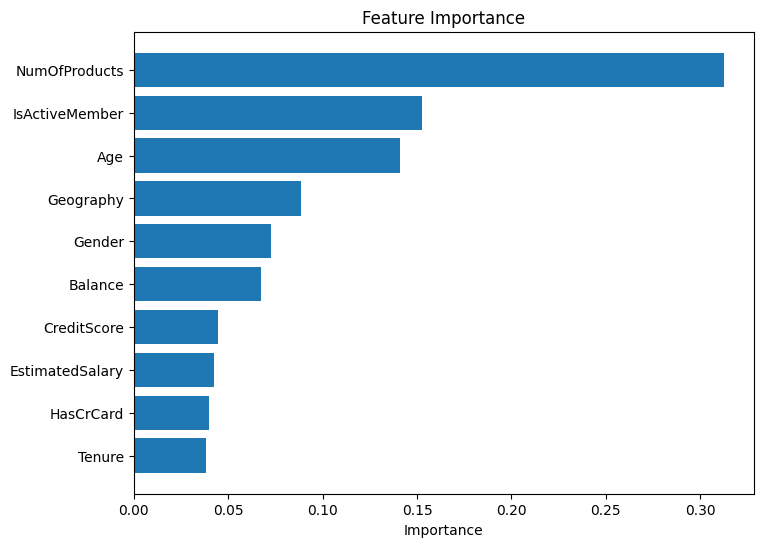

In [28]:
plt.figure(figsize=(8,6))
importance = xgb_model.feature_importances_
sorted_idx = np.argsort(importance)
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()


In [32]:
os.makedirs("../app/models",exist_ok=True)
joblib.dump(xgb_model, "../app/models/churn_model_v1.pkl")

print("Baseline model saved")

Baseline model saved
